## Pandas的stack和pivot实现数据透视


<img src="./other_files/reshaping_example.png" style="margin-left:0px; width:600px" />

1. 经过统计得到多维度指标数据
2. 使用unstack实现数据二维透视
3. 使用pivot简化透视
4. stack、unstack、pivot的语法

###  1. 经过统计得到多维度指标数据

非常常见的统计场景，指定多个维度，计算聚合后的指标  

实例：统计得到“电影评分数据集”，每个月份的每个分数被评分多少次：（月份、分数1~5、次数）

In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [7]:
df = pd.read_csv(
    "./datas/movielens-1m/ratings.dat",
    header=None,
    names="UserID::MovieID::Rating::Timestamp".split("::"),
    sep="::",
    engine="python"
)

In [8]:
df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [9]:
df["pdate"] = pd.to_datetime(df["Timestamp"], unit='s')

In [10]:
df.head()

,UserID,MovieID,Rating,Timestamp,pdate
0,1,1193,5,978300760,2000-12-31 22:12:40
1,1,661,3,978302109,2000-12-31 22:35:09
2,1,914,3,978301968,2000-12-31 22:32:48
3,1,3408,4,978300275,2000-12-31 22:04:35
4,1,2355,5,978824291,2001-01-06 23:38:11


In [11]:
df.dtypes

UserID                int64
MovieID               int64
Rating                int64
Timestamp             int64
pdate        datetime64[ns]
dtype: object

In [12]:
# 实现数据统计
df_group = df.groupby([df["pdate"].dt.month, "Rating"])["UserID"].agg(pv=np.size)

In [13]:
df_group.head(20)

pv
pdate Rating      
1     1        989
      2       2420
      3       5940
      4       7566
      5       3892
2     1        530
      2       1202
      3       2695
      4       3669
      5       1914
3     1        388
      2        969
      3       2296
      4       2744
      5       1311
4     1        472
      2        869
      3       1947
      4       2555
      5       1225

对这样格式的数据，我想查看按月份，不同评分的次数趋势，是没法实现的

需要将数据变换成每个评分是一列才可以实现

### 2. 使用unstack实现数据二维透视

目的：想要画图对比按照月份的不同评分的数量趋势

In [14]:
df_stack = df_group.unstack()
df_stack

pv                             
Rating      1      2      3       4      5
pdate                                     
1         989   2420   5940    7566   3892
2         530   1202   2695    3669   1914
3         388    969   2296    2744   1311
4         472    869   1947    2555   1225
5         344    749   1697    2309   1008
6         316    783   1702    2163   1023
7        2677   5107  13255   17773  10718
8       10667  20184  49598   62891  41659
9        3013   5597  13905   18834  12634
10       1923   4458  11476   15372   9941
11      17669  32121  75861  102112  66740
12       6396  12851  30448   40583  26496

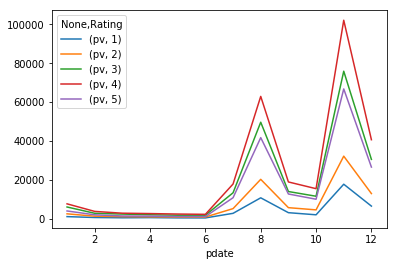

In [15]:
df_stack.plot()

In [16]:
# unstack和stack是互逆操作
df_stack.stack().head(20)

pv
pdate Rating      
1     1        989
      2       2420
      3       5940
      4       7566
      5       3892
2     1        530
      2       1202
      3       2695
      4       3669
      5       1914
3     1        388
      2        969
      3       2296
      4       2744
      5       1311
4     1        472
      2        869
      3       1947
      4       2555
      5       1225

### 3. 使用pivot简化透视

In [17]:
df_group.head(20)

pv
pdate Rating      
1     1        989
      2       2420
      3       5940
      4       7566
      5       3892
2     1        530
      2       1202
      3       2695
      4       3669
      5       1914
3     1        388
      2        969
      3       2296
      4       2744
      5       1311
4     1        472
      2        869
      3       1947
      4       2555
      5       1225

In [18]:
df_reset = df_group.reset_index()
df_reset.head()

,pdate,Rating,pv
0,1,1,989
1,1,2,2420
2,1,3,5940
3,1,4,7566
4,1,5,3892


In [19]:
df_pivot = df_reset.pivot("pdate", "Rating", "pv")

In [20]:
df_pivot.head()

Rating,1,2,3,4,5
pdate,,,,,
1,989,2420,5940,7566,3892
2,530,1202,2695,3669,1914
3,388,969,2296,2744,1311
4,472,869,1947,2555,1225
5,344,749,1697,2309,1008


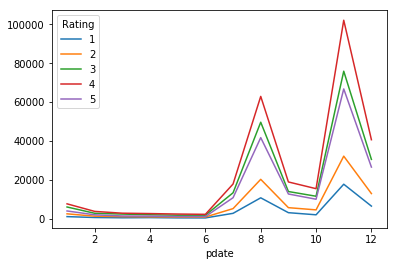

In [21]:
df_pivot.plot()

***pivot方法相当于对df使用set_index创建分层索引，然后调用unstack***

### 4. stack、unstack、pivot的语法

#### stack：DataFrame.stack(level=-1, dropna=True)，将column变成index，类似把横放的书籍变成竖放

level=-1代表多层索引的最内层，可以通过==0、1、2指定多层索引的对应层

<img src="./other_files/reshaping_stack.png" style="margin-left:0px; width:600px" />

#### unstack：DataFrame.unstack(level=-1, fill_value=None)，将index变成column，类似把竖放的书籍变成横放

<img src="./other_files/reshaping_unstack.png" style="margin-left:0px; width:600px" />

#### pivot：DataFrame.pivot(index=None, columns=None, values=None)，指定index、columns、values实现二维透视

<img src="./other_files/reshaping_pivot.png" style="margin-left:0px; width:600px" />